# Modelo de Procesamiento de Datos de Movimiento

Autores: 

-Juan Sebastián Cely Botia

-Juan Carlos Ceron Lombana

-Juan Diego Díaz Guzmán
    
## Introducción

El modelo consiste en la captura y el procesamiento de datos de movimiento a partir de un dispositivo móvil para desarrollar un modelo de inteligencia artificial con capacidades de clasificación.

## Marco Teórico

// Incluir marco teórico relacionado con el caso de estudio

## Descripción del problema a solucionar

Se pretende desarrollar un modelo de inteligencia artificial mediante redes neuronales que sea capaz de clasificar correctamente datos de movimiento capturados con un acelerómetro de un teléfono móvil para los siguientes movimientos: corriendo, caminando, reposo, arriba, abajo, ola, izquierda y derecha. Se pretende entrenar el modelo con las series de coordenadas espaciales etiquetadas y comprobar su precisión mediante métricas establecidas. 

## Planteamiento de la solución

In [96]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



### Importar datos del objeto JSON

In [80]:
# Cargar datos desde el archivo JSON
path = '../data/motion/arriba-jd3.json' # Path par aGitHub
# path = '' # Path para Google Colab

with open(path, 'r') as file:
    datos_json = json.load(file)

# Extraer los valores de los sensores
valores_sensores = datos_json['payload']['values']

print("Valores de los sensores:")
print(valores_sensores)

Valores de los sensores:
[[-0.10639240933842957, -9.012222208073736, -4.737677341681718], [0.6982089860778301, -8.781930520409345, -3.971981430982053], [0.000598641746584326, -8.526349493187665, -4.041862191937864], [-0.32635943113695826, -8.448088441899419, -4.628591236279904], [-0.15472517268974334, -8.809164564293622, -6.0303963083013885], [-0.236277812869288, -8.90029386498332, -4.734085746930539], [-0.326509050474409, -8.682870426720381, -4.477756531690061], [-0.6335656143188476, -8.241439495629072, -4.957345051740109], [-0.48288043773490935, -8.348879295128583, -5.092917013007402], [-0.24690208273623138, -8.19145995145142, -5.224298244586587], [-0.14799146225424484, -7.915828069847822, -4.810400632587075], [0.3359365106305748, -8.456169457024336, -3.5194776094734666], [0.4147956202851608, -8.4533263425529, -2.818425435858965], [1.0187328337959478, -8.56181360527873, -3.727622931781411], [0.6877346278092824, -7.860162881249189, -4.252402300427854], [-0.3263595407348126, -8.1583906

### Visualización de datos iniciales

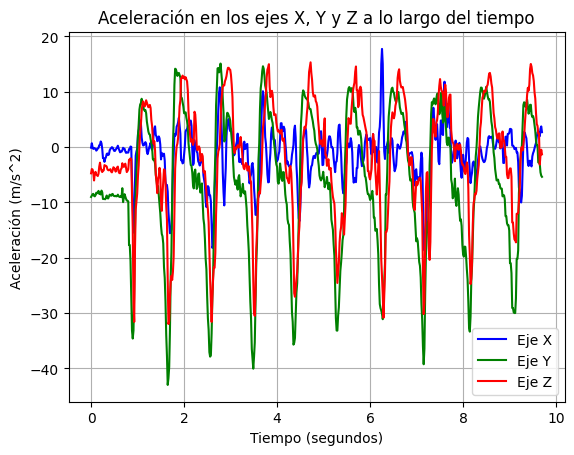

In [81]:
# Obtener los valores de la aceleración en el eje X, Y y Z
valores_x = [dato[0] for dato in valores_sensores]
valores_y = [dato[1] for dato in valores_sensores]
valores_z = [dato[2] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# Suponiendo que los datos se registraron a intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar los valores de la aceleración en el eje X, Y y Z con respecto al tiempo
plt.plot(tiempos, valores_x, label='Eje X', color='blue')
plt.plot(tiempos, valores_y, label='Eje Y', color='green')
plt.plot(tiempos, valores_z, label='Eje Z', color='red')

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración en los ejes X, Y y Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()


### Análisis de patrones de movimiento

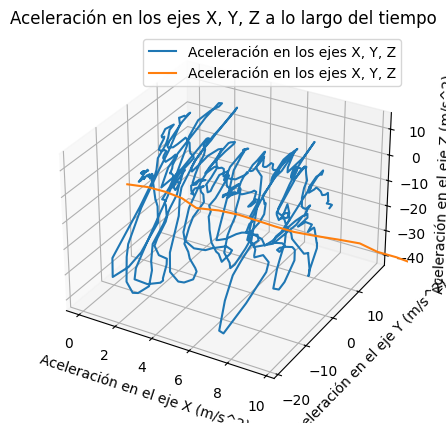

In [82]:

# Obtener los valores de aceleración en los ejes X, Y, Z
valores_x = [dato[0] for dato in valores_sensores]
valores_y = [dato[1] for dato in valores_sensores]
valores_z = [dato[2] for dato in valores_sensores]

# Crear una lista de tiempos para cada punto de datos
# intervalos regulares de 16 ms
tiempos = [i * 0.016 for i in range(len(valores_x))]

# Trazar la aceleración en los ejes X, Y, Z en una gráfica tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tiempos, valores_x, valores_y, valores_z, label='Aceleración en los ejes X, Y, Z')
ax.set_xlabel('Aceleración en el eje X (m/s^2)')
ax.set_ylabel('Aceleración en el eje Y (m/s^2)')
ax.set_zlabel('Aceleración en el eje Z (m/s^2)')
plt.title('Aceleración en los ejes X, Y, Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()

## Preparar los datos

In [83]:
valores_sensores = list(zip(valores_x, valores_y, valores_z))
datos = np.array(valores_sensores)  

## Escalar los datos

In [84]:
scaler = MinMaxScaler()
datos_escalados = scaler.fit_transform(datos)

## Visualizar los datos escalados


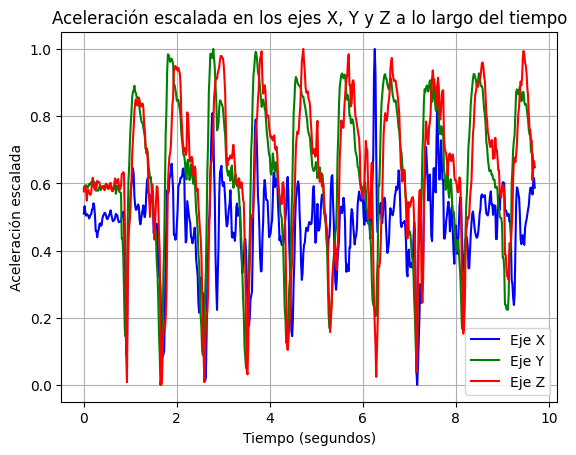

In [85]:
# Descomponer los datos escalados por eje para su visualización
datos_x_escalados = datos_escalados[:, 0]
datos_y_escalados = datos_escalados[:, 1]
datos_z_escalados = datos_escalados[:, 2]

# Crear los tiempos para cada punto de datos
tiempos = [i * 0.016 for i in range(len(datos_x_escalados))]

# Trazar los valores de la aceleración escalados en el eje X, Y y Z con respecto al tiempo
plt.plot(tiempos, datos_x_escalados, label='Eje X', color='blue')
plt.plot(tiempos, datos_y_escalados, label='Eje Y', color='green')
plt.plot(tiempos, datos_z_escalados, label='Eje Z', color='red')

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Aceleración escalada')
plt.title('Aceleración escalada en los ejes X, Y y Z a lo largo del tiempo')
plt.grid(True)
plt.legend()
plt.show()


In [86]:
#Definir los patametros de la ventana

tamaño_ventana = 10  # Por ejemplo, 10 mediciones consecutivas
paso_ventana = 1     # Cada ventana comienza 1 paso después de la anterior


In [87]:
#Creación de las ventanas

def crear_ventanas(datos, tamaño_ventana, paso_ventana):
    X = []
    n_muestras = len(datos) - tamaño_ventana + 1
    for inicio in range(0, n_muestras, paso_ventana):
        fin = inicio + tamaño_ventana
        ventana = datos[inicio:fin]
        X.append(ventana)
    return np.array(X)

In [88]:
# Aplicar la función a los Datos simulados
valores_x = np.random.rand(100)
valores_y = np.random.rand(100)
valores_z = np.random.rand(100)

# Combinar en un único array de (n_muestras, n_canales)
datos = np.column_stack((valores_x, valores_y, valores_z))

# Crear ventanas
X_train = crear_ventanas(datos, tamaño_ventana, paso_ventana)

In [89]:
#Verificar las dimensiones

print("Forma de la entrada de entrenamiento:", X_train.shape)
# Deberías obtener algo como (91, 10, 3) si hay 100 datos y usas ventanas de tamaño 10 con paso 1


Forma de la entrada de entrenamiento: (91, 10, 3)


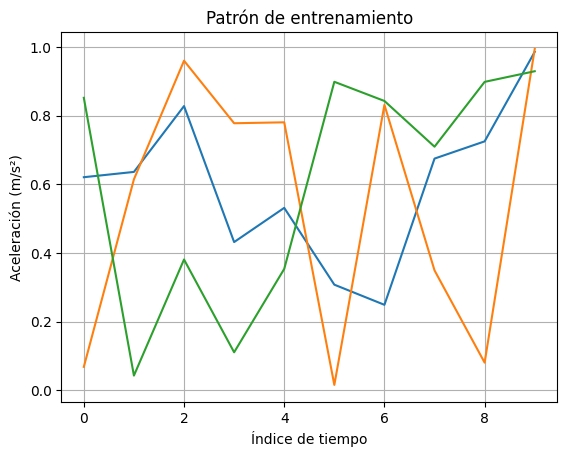

In [90]:
#Visualizar patrón de entrenamiento

# Visualizar la muestra número 10 del conjunto de entrenamiento
plt.plot(X_train[10,:,:])
plt.xlabel('Índice de tiempo')
plt.ylabel('Aceleración (m/s²)')
plt.title('Patrón de entrenamiento')
plt.grid(True)
plt.show()

## Modelo basado en MLP

In [94]:
labels = np.random.rand(X_train.shape[0])  # Generar etiquetas aleatorias para este ejemplo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, labels, test_size=0.2, random_state=42)

# Definir el modelo MLP
model = MLPRegressor(hidden_layer_sizes=(100, 50),  
                     activation='relu',            
                     solver='adam',                
                     max_iter=1000,                
                     random_state=42)              

# Entrenar el modelo
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.1529454190902323


In [39]:

# Definición del Modelo MLP
model_mlp = Sequential([
    Flatten(input_shape=(3,)),  
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(5, activation='softmax')  
])

# Compilación del Modelo
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Imprimir Modelo
model_mlp.summary()

# Entrenamiento del Modelo
history_mlp = model_mlp.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

NameError: name 'Flatten' is not defined

### Preprocesamiento de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Supongamos que 'valores_sensores' contiene tus datos de sensores
# y que ya has extraído las características relevantes y las etiquetas de clase de tus datos

# Obtener las características (X) y las etiquetas de clase (y)
X = [[-0.10639240933842957, -9.012222208073736, -4.737677341681718],
     [0.6982089860778301, -8.781930520409345, -3.971981430982053],
     [0.000598641746584326, -8.526349493187665, -4.041862191937864],
     [-0.32635943113695826, -8.448088441899419, -4.628591236279904],
     [-0.15472517268974334, -8.809164564293622, -6.0303963083013885],
     [-0.236277812869288, -8.90029386498332, -4.734085746930539],
     [-0.326509050474409, -8.682870426720381, -4.477756531690061],
     [-0.6335656143188476, -8.241439495629072, -4.957345051740109]]

y = ['caminar', 'caminar', 'correr', 'estar_quieto', 'caminar', 'correr', 'estar_quieto', 'caminar']

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Normalizar los datos
X_normalizado = scaler.fit_transform(X)

### Eliminación de valores faltantes

In [ ]:
from sklearn.impute import SimpleImputer

# Supongamos que 'X' contiene tus datos con valores faltantes

# Inicializar el objeto SimpleImputer con la estrategia de imputación
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a tus datos
X_imputado = imputer.fit_transform(X)

### Modelo de Árbol de Decisión

In [ ]:
from sklearn.impute import SimpleImputer

# Supongamos que 'X' contiene tus datos con valores faltantes

# Inicializar el objeto SimpleImputer con la estrategia de imputación
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a tus datos
X_imputado = imputer.fit_transform(X)


### Entrenamiento del modelo

In [ ]:
# Entrenar el modelo utilizando el conjunto de entrenamiento
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular la precisión balanceada del modelo
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Precisión balanceada del modelo:", balanced_accuracy)

NameError: name 'decision_tree_model' is not defined

In [ ]:
# Verificar los datos de entrada
print("Ejemplos de datos de entrada:")
print(X_train[:5])  # Imprimir las primeras 5 muestras de datos de entrenamiento
print("Etiquetas correspondientes:")
print(y_train[:5])  # Imprimir las primeras 5 etiquetas correspondientes


In [ ]:
# Explorar el balance de clases
from collections import Counter

# Calcular la distribución de clases en el conjunto de entrenamiento
clases_train = Counter(y_train)
print("Distribución de clases en el conjunto de entrenamiento:")
print(clases_train)

# Calcular la distribución de clases en el conjunto de prueba
clases_test = Counter(y_test)
print("\nDistribución de clases en el conjunto de prueba:")
print(clases_test)


## Resultados

// Espacio para el análisis de los resultados obtenidos

## Referencias

// Incluir referencias encontradas